In [2]:
import sys
sys.path.append("/Users/sungbae/qcore")
sys.path.append("/Users/sungbae/Vs30")
from qcore import geo
from vs30 import model_geology,sites_cluster
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

vs30_results="/Users/sungbae/CPT_Vs30/vs30_results.csv"

In [3]:
points=np.array([[1759275.267087352],[5903767.814975549]]).T

In [4]:
model_geology.model_id(points)

array([12], dtype=uint8)

In [5]:
vs30_df=pd.read_csv(vs30_results,index_col=0)

In [6]:
vs30_df

,NZTM_X,NZTM_Y,Vsz,Vs30,Zmax,Zmin,Zspan
CPT_1,1.576467e+06,5.181262e+06,171.591623,184.625369,25,0.04,25.92
CPT_10001,1.570257e+06,5.178666e+06,NaN,NaN,23,0.00,23.34
CPT_10005,1.570682e+06,5.180753e+06,140.656166,166.268288,20,0.40,19.66
CPT_10020,1.573641e+06,5.181902e+06,143.368788,189.265344,16,0.02,16.50
CPT_100360,1.744529e+06,5.923062e+06,98.285817,162.749444,10,0.01,10.96
...,...,...,...,...,...,...,...
SCPT_TT91813,1.746455e+06,5.968871e+06,89.718128,114.361070,16,0.01,16.68
SCPT_TT95225,1.746254e+06,5.969342e+06,94.292581,128.787178,14,0.01,14.74
SCPT_TT95396,1.746122e+06,5.969631e+06,98.712057,130.815895,15,0.01,15.42
SCPT_TT95420,1.746165e+06,5.969918e+06,76.587603,142.757404,8,0.01,8.32


In [7]:
points=vs30_df[['NZTM_X','NZTM_Y']].values

In [8]:
#model_ids=model_geology.model_id(points)
#np.savetxt("model_ids.csv",model_ids)

In [9]:
model_ids=np.loadtxt("model_ids.csv")

In [10]:
len(model_ids[model_ids==255])

204

In [11]:
vs30_df['geo_model_idx']=model_ids

In [12]:
vs30_df

,NZTM_X,NZTM_Y,Vsz,Vs30,Zmax,Zmin,Zspan,geo_model_idx
CPT_1,1.576467e+06,5.181262e+06,171.591623,184.625369,25,0.04,25.92,6.0
CPT_10001,1.570257e+06,5.178666e+06,NaN,NaN,23,0.00,23.34,10.0
CPT_10005,1.570682e+06,5.180753e+06,140.656166,166.268288,20,0.40,19.66,10.0
CPT_10020,1.573641e+06,5.181902e+06,143.368788,189.265344,16,0.02,16.50,10.0
CPT_100360,1.744529e+06,5.923062e+06,98.285817,162.749444,10,0.01,10.96,12.0
...,...,...,...,...,...,...,...,...
SCPT_TT91813,1.746455e+06,5.968871e+06,89.718128,114.361070,16,0.01,16.68,12.0
SCPT_TT95225,1.746254e+06,5.969342e+06,94.292581,128.787178,14,0.01,14.74,12.0
SCPT_TT95396,1.746122e+06,5.969631e+06,98.712057,130.815895,15,0.01,15.42,4.0
SCPT_TT95420,1.746165e+06,5.969918e+06,76.587603,142.757404,8,0.01,8.32,4.0


In [13]:
vs30_df=vs30_df.loc[vs30_df['geo_model_idx']!=255] #remove 255 Not necessary. ID_NODATA
#plt.hist(vs30_df.geo_model_idx,bins=20)
#plt.show()

In [14]:
vs30_df.loc[vs30_df['geo_model_idx']==0].describe() #water. shall remove.

,NZTM_X,NZTM_Y,Vsz,Vs30,Zmax,Zmin,Zspan,geo_model_idx
count,4.300000e+01,4.300000e+01,42.000000,42.000000,43.000000,43.000000,43.000000,43.0
mean,1.699078e+06,5.607002e+06,108.828148,137.957574,17.860465,0.928837,17.525256,0.0
std,1.862854e+05,3.426467e+05,35.679662,35.417525,7.799821,2.559647,8.035357,0.0
min,1.262449e+06,5.004587e+06,56.753119,59.236316,5.000000,0.000000,5.120000,0.0
25%,1.577938e+06,5.181173e+06,84.906572,113.136023,12.500000,0.025000,10.560000,0.0
50%,1.794363e+06,5.774801e+06,97.266896,136.687868,16.000000,0.030000,15.960000,0.0
75%,1.794631e+06,5.837151e+06,138.562754,162.096344,25.500000,0.060000,24.400500,0.0
max,1.885190e+06,6.034310e+06,172.626226,206.639628,29.000000,11.960000,29.961000,0.0


In [15]:
geo_ids={0: ("G00","Water"),
         1: ("G01","Peat"),
         2: ("G04","Artificial fill"),
         3: ("G05","Fluvial and esturarine deposits"),
         4: ("G06","Alluvium and valley sediments"),
         5: ("G08","Lacustrine"),
         6: ("G09", "Beach, bar, dune deposits"),
         7: ("G10", "Fan deposits"),
         8: ("G11", "Loess"),
         9: ("G12", "Glacigenic sediments"),
         10: ("G13", "Flood deposits"),
         11: ("G14", "Glacial moraines and till"),
         12: ("G15", "Undifferentiated sediments and sedimentary rocks"),
         13: ("G16", "Terrace deposits and old alluvium"),
         14: ("G17", "Volcanic rocks and deposits"),
         15: ("G18", "Crystalline rocks"),
        }


In [16]:
for i,(gid,geo_name) in geo_ids.items():
    print(gid, geo_name)
    print(vs30_df.loc[vs30_df['geo_model_idx']==i].describe())

G00 Water
             NZTM_X        NZTM_Y         Vsz        Vs30       Zmax  \
count  4.300000e+01  4.300000e+01   42.000000   42.000000  43.000000   
mean   1.699078e+06  5.607002e+06  108.828148  137.957574  17.860465   
std    1.862854e+05  3.426467e+05   35.679662   35.417525   7.799821   
min    1.262449e+06  5.004587e+06   56.753119   59.236316   5.000000   
25%    1.577938e+06  5.181173e+06   84.906572  113.136023  12.500000   
50%    1.794363e+06  5.774801e+06   97.266896  136.687868  16.000000   
75%    1.794631e+06  5.837151e+06  138.562754  162.096344  25.500000   
max    1.885190e+06  6.034310e+06  172.626226  206.639628  29.000000   

            Zmin      Zspan  geo_model_idx  
count  43.000000  43.000000           43.0  
mean    0.928837  17.525256            0.0  
std     2.559647   8.035357            0.0  
min     0.000000   5.120000            0.0  
25%     0.025000  10.560000            0.0  
50%     0.030000  15.960000            0.0  
75%     0.060000  24.40050

In [17]:
means = []
errors = []
for i,(gid,geo_name) in geo_ids.items():
    print(gid, geo_name)
    count = vs30_df.loc[vs30_df['geo_model_idx']==i].Vs30.count()
    vs30_mean= vs30_df.loc[vs30_df['geo_model_idx']==i].Vs30.mean()
    vs30_std = vs30_df.loc[vs30_df['geo_model_idx']==i].Vs30.std()
    print("n = {} vs30={} std= {}".format(count, vs30_mean, vs30_std))
    if (i==0): #skip water
        continue
    means.append(vs30_mean)
    errors.append(vs30_std)

vs30_df=vs30_df.loc[vs30_df['geo_model_idx']!=0]

G00 Water
n = 42 vs30=137.95757402603644 std= 35.417525174596435
G01 Peat
n = 1058 vs30=167.31095468070615 std= 29.06233366898232
G04 Artificial fill
n = 460 vs30=153.50312119737816 std= 34.62625074915294
G05 Fluvial and esturarine deposits
n = 1038 vs30=173.35558604578387 std= 27.556892107901565
G06 Alluvium and valley sediments
n = 4707 vs30=155.60288052415652 std= 29.718242573470548
G08 Lacustrine
n = 101 vs30=157.91403418318652 std= 17.864713432688383
G09 Beach, bar, dune deposits
n = 5267 vs30=187.63605727916308 std= 21.058541389004535
G10 Fan deposits
n = 162 vs30=169.4943973893365 std= 33.39446202353186
G11 Loess
n = 580 vs30=182.32174454411944 std= 30.35900907120481
G12 Glacigenic sediments
n = 4 vs30=208.20746344697002 std= 58.13597740767905
G13 Flood deposits
n = 9197 vs30=175.0714637806008 std= 27.426220852793065
G14 Glacial moraines and till
n = 11 vs30=153.3401424916905 std= 18.50263384727624
G15 Undifferentiated sediments and sedimentary rocks
n = 2566 vs30=154.7596588429

In [18]:
prior=model_geology.model_prior()
posterior = model_geology.model_posterior_paper()
prior_means=prior.T[0]
prior_errors=prior.T[1]*prior_means
posterior_means = posterior.T[0]
posterior_errors = posterior.T[1]*posterior_means

prior_means

array([161., 198., 239., 323., 326., 339., 360., 376., 399., 448., 453.,
       455., 458., 635., 750.], dtype=float32)

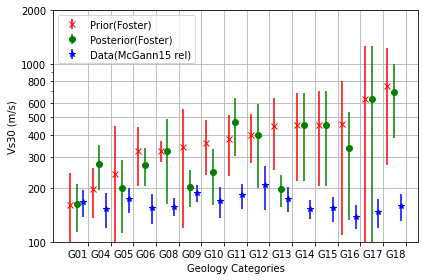

In [19]:
geo_id_codes= [x for x,_ in geo_ids.values()][1:] #excluding water (G01, G04 ....)
fig,ax=plt.subplots()
ax.set_xlabel("Geology Categories")
ax.set_ylabel("Vs30 (m/s)")
#ax.yaxis.grid(True)

ax.set_yscale('log')
ax.set_ylim([100,2000])
yticks=[100,200,300,400,500,600,800,1000,2000]
ax.set_yticks(yticks)
ax.set_yticklabels(yticks)
geo_id_values = np.array([(i+1)*10 for i in range(len(geo_ids)-1)]) #excluding water

ax.set_xticks(geo_id_values)
ax.set_xticklabels(geo_id_codes,fontdict={'horizontalalignment':'right'})

prior_eb=ax.errorbar(geo_id_values-8,prior_means, prior_errors,linestyle="None",marker='x',color="red")
posterior_eb=ax.errorbar(geo_id_values-5,posterior_means, posterior_errors,linestyle="None",marker='o',color="green")
new_eb=ax.errorbar(geo_id_values-2,means,errors,linestyle='None',marker='*',color="blue")

ax.grid()

ax.legend([prior_eb,posterior_eb,new_eb],['Prior(Foster)','Posterior(Foster)','Data(McGann15 rel)'],loc=2)

#plt.rcParams['figure.dpi']=300
plt.rcParams["figure.figsize"] = (6,4)


plt.tight_layout()
plt.show()

In [20]:
from vs30 import model

vs30_from_CPT=vs30_df[['NZTM_X','NZTM_Y','Vs30','geo_model_idx']]
sites=vs30_from_CPT.loc[~np.isnan(np.float64(vs30_from_CPT['Vs30']))]
sites=sites.rename(columns={"NZTM_X":"easting","NZTM_Y":"northing","Vs30":"vs30"})
sites['gid']=np.array([x-1 for x in sites['geo_model_idx']]) #geo id is 1 greater than index in prior
sites['uncertainty']=0.5
sites
new_posterior=model.posterior(prior,sites,"gid")


In [21]:
x,y=new_posterior[0]
print(x)
sites

164.79825


,easting,northing,vs30,geo_model_idx,gid,uncertainty
CPT_1,1.576467e+06,5.181262e+06,184.625369,6.0,5.0,0.5
CPT_10005,1.570682e+06,5.180753e+06,166.268288,10.0,9.0,0.5
CPT_10020,1.573641e+06,5.181902e+06,189.265344,10.0,9.0,0.5
CPT_100360,1.744529e+06,5.923062e+06,162.749444,12.0,11.0,0.5
CPT_100487,1.574119e+06,5.177888e+06,186.393302,10.0,9.0,0.5
...,...,...,...,...,...,...
SCPT_TT91813,1.746455e+06,5.968871e+06,114.361070,12.0,11.0,0.5
SCPT_TT95225,1.746254e+06,5.969342e+06,128.787178,12.0,11.0,0.5
SCPT_TT95396,1.746122e+06,5.969631e+06,130.815895,4.0,3.0,0.5
SCPT_TT95420,1.746165e+06,5.969918e+06,142.757404,4.0,3.0,0.5


In [22]:
geo_ids

{0: ('G00', 'Water'),
 1: ('G01', 'Peat'),
 2: ('G04', 'Artificial fill'),
 3: ('G05', 'Fluvial and esturarine deposits'),
 4: ('G06', 'Alluvium and valley sediments'),
 5: ('G08', 'Lacustrine'),
 6: ('G09', 'Beach, bar, dune deposits'),
 7: ('G10', 'Fan deposits'),
 8: ('G11', 'Loess'),
 9: ('G12', 'Glacigenic sediments'),
 10: ('G13', 'Flood deposits'),
 11: ('G14', 'Glacial moraines and till'),
 12: ('G15', 'Undifferentiated sediments and sedimentary rocks'),
 13: ('G16', 'Terrace deposits and old alluvium'),
 14: ('G17', 'Volcanic rocks and deposits'),
 15: ('G18', 'Crystalline rocks')}

In [23]:
def dist_x_range(mean,std,n_bins):
    return np.linspace(mean-3*std,mean+3*std,n_bins)
    
def __plot_hist_dist(vs30_data,n_bins,prior_mean,prior_std,posterior_mean,posterior_std,new_posterior_mean,new_posterior_std,gid,desc,new_posterior_legend):
    fig,ax=plt.subplots()
    ax.set_xlabel("Vs30 (m/s)")
    ax.set_ylabel("Probability")
   # vs30=vs30_df.loc[vs30_df['geo_model_idx']==id].Vs30

    new_p=ax.hist(vs30_data,bins=n_bins, density=True,color="blue",label="Data(McGann15 rel)")

    
    x=dist_x_range(prior_mean,prior_std,n_bins)
    ax.plot(x,stats.norm.pdf(x,prior_mean,prior_std),color="red",label="Prior (Foster)")

    
    x=dist_x_range(posterior_mean,posterior_std,n_bins)
    ax.plot(x,stats.norm.pdf(x,posterior_mean,posterior_std),color="green",label="Posterior (Foster)")

    
    x=dist_x_range(new_posterior_mean,new_posterior_std,n_bins)
    ax.plot(x,stats.norm.pdf(x,new_posterior_mean,new_posterior_std),color="gray",label="Posterior ({})".format(new_posterior_legend))

    ax.legend(loc=2)
    ax.set_title("{}: {}".format(gid,desc))
    plt.show()
    fig.savefig('{}.png'.format(gid))

def plot_hist_dist(id):
    __plot_hist_dist(vs30_df.loc[vs30_df['geo_model_idx']==id].Vs30, 50, prior_means[id-1],prior_errors[id-1],
                     posterior_means[id-1],posterior_errors[id-1],
                     new_posterior[id-1][0],new_posterior[id-1][0]*new_posterior[id-1][1],
                     geo_ids[id][0],geo_ids[id][1],"Prior+Data")    
    
    
    

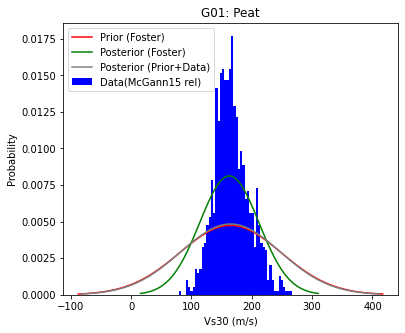

In [24]:
plt.rcParams["figure.figsize"] = (6,5)
plot_hist_dist(1)


        

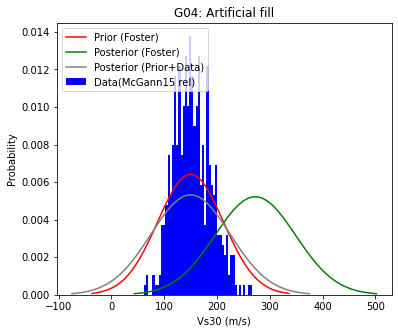

In [25]:
plot_hist_dist(2)

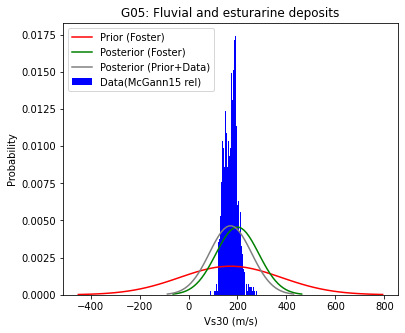

In [26]:
plot_hist_dist(3)

In [27]:
import sklearn
sklearn
sklearn.__version__
import importlib
from vs30 import sites_cluster
importlib.reload(sites_cluster)

<module 'vs30.sites_cluster' from '/Users/sungbae/Vs30/vs30/sites_cluster.py'>

In [28]:
clustered_sites=sites_cluster.cluster(sites,min_group=100, eps=80000,letter="g")
features = np.column_stack((sites.easting.values, sites.northing.values))
print(clustered_sites.describe())


#for i in range(-1,cluster_num):
#    print("i:{} {}".format(i,len(cluster_sites.loc[cluster_sites.gcluster==i])))
clustered_sites.to_csv("clustered_sites.csv")


            easting      northing          vs30  geo_model_idx           gid  \
count  2.649100e+04  2.649100e+04  26491.000000   26491.000000  26491.000000   
mean   1.675710e+06  5.432915e+06    170.272668       7.699558      6.699558   
std    1.374338e+05  3.127554e+05     29.535839       3.490784      3.490784   
min    1.240360e+06  4.829226e+06     22.952834       1.000000      0.000000   
25%    1.571643e+06  5.181381e+06    149.798258       4.000000      3.000000   
50%    1.576406e+06  5.186031e+06    170.127397       8.000000      7.000000   
75%    1.792146e+06  5.813068e+06    190.177554      10.000000      9.000000   
max    2.063247e+06  6.095989e+06    300.275847      15.000000     14.000000   

       uncertainty      gcluster  
count      26491.0  26491.000000  
mean           0.5      0.127591  
std            0.0      0.523323  
min            0.5     -1.000000  
25%            0.5      0.000000  
50%            0.5      0.000000  
75%            0.5      0.000000  

Gid=0 # clusters=3
Gid=1 # clusters=3
Gid=2 # clusters=2
Gid=3 # clusters=5
Gid=4 # clusters=1
Gid=5 # clusters=4
Gid=6 # clusters=1
Gid=7 # clusters=3
Gid=8 # clusters=1
Gid=9 # clusters=1
Gid=10 # clusters=1
Gid=11 # clusters=3
Gid=12 # clusters=2
Gid=13 # clusters=1
Gid=14 # clusters=2


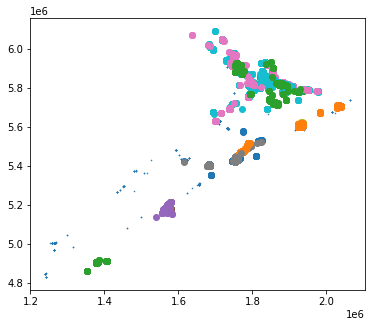

In [29]:
fig,ax=plt.subplots()

ax.scatter(features[:,0],features[:,1],s=0.3)
for g in range(0,15):
#for g in range(0,1):
    clustered_sites_gid = clustered_sites.loc[clustered_sites.gid==g]
    counts = clustered_sites_gid.nunique()
    print("Gid={} # clusters={}".format(g,counts.gcluster))
    for c in range(0,counts.gcluster):
    #for c in range(0,1):
        a_cluster=clustered_sites_gid.loc[clustered_sites_gid.gcluster==c]
        ax.scatter(a_cluster.easting,a_cluster.northing)
plt.rcParams["figure.figsize"] = (10,10)
plt.show()


In [30]:
from vs30 import model
clustered_posterior=model.cluster_update(new_posterior,clustered_sites,"g")


In [31]:
    
def __plot_hist_dist2(vs30_data,n_bins,prior_mean,prior_std,posterior_mean,posterior_std,new_posterior_mean,new_posterior_std, clustered_posterior_mean,clustered_posterior_std, gid,desc):
    fig,ax=plt.subplots()
    ax.set_xlabel("Vs30 (m/s)")
    ax.set_ylabel("Probability")
   # vs30=vs30_df.loc[vs30_df['geo_model_idx']==id].Vs30

    new_p=ax.hist(vs30_data,bins=n_bins, density=True,color="blue",label="Data(McGann15 rel)")

    
    x=dist_x_range(prior_mean,prior_std,n_bins)
    ax.plot(x,stats.norm.pdf(x,prior_mean,prior_std),color="red",label="Prior (Foster)")

    
    x=dist_x_range(posterior_mean,posterior_std,n_bins)
    ax.plot(x,stats.norm.pdf(x,posterior_mean,posterior_std),color="green",label="Posterior (Foster)")

    
    x=dist_x_range(new_posterior_mean,new_posterior_std,n_bins)
    ax.plot(x,stats.norm.pdf(x,new_posterior_mean,new_posterior_std),color="gray",label="Data/Posterior (unclstrd)")
    
    x=dist_x_range(clustered_posterior_mean,clustered_posterior_std,n_bins)
    ax.plot(x,stats.norm.pdf(x,clustered_posterior_mean,clustered_posterior_std),color="orange",label="Data/Posterior (clustered)")

    ax.legend(loc=2)
    ax.set_title("{}: {}".format(gid,desc))
    plt.show()
    fig.savefig('{}.png'.format(gid))

def clustered_plot_hist_dist(id):
    __plot_hist_dist2(vs30_df.loc[vs30_df['geo_model_idx']==id].Vs30, 50, prior_means[id-1],prior_errors[id-1],
                     posterior_means[id-1],posterior_errors[id-1],
                     new_posterior[id-1][0],new_posterior[id-1][0]*new_posterior[id-1][1],
                     clustered_posterior[id-1][0],clustered_posterior[id-1][0]*clustered_posterior[id-1][1],
                     geo_ids[id][0],geo_ids[id][1])    
    

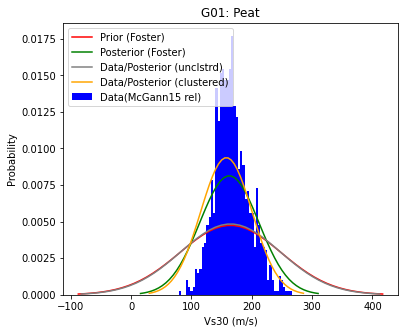

In [32]:
plt.rcParams["figure.figsize"] = (6,5)
clustered_plot_hist_dist(1)

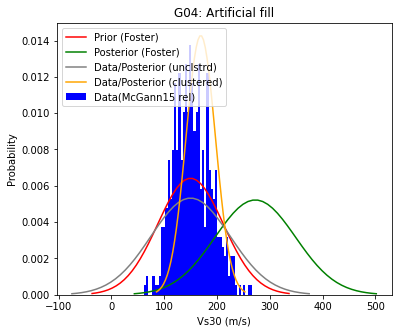

In [33]:
clustered_plot_hist_dist(2)

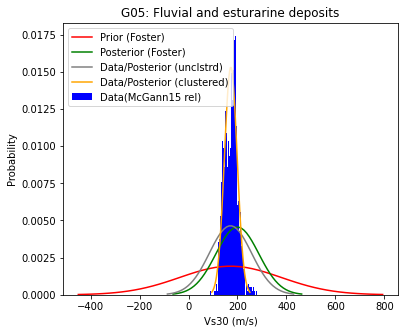

In [34]:
clustered_plot_hist_dist(3)

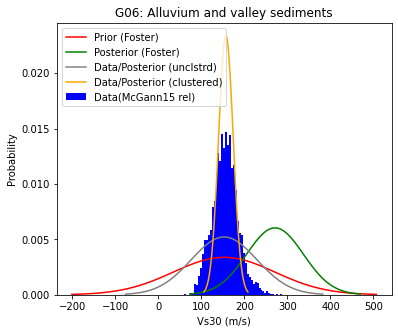

In [35]:
clustered_plot_hist_dist(4)

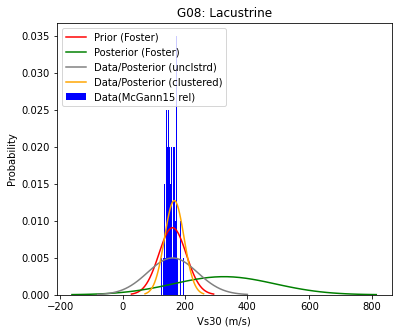

In [36]:
clustered_plot_hist_dist(5)

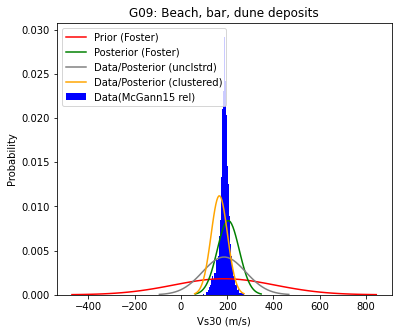

In [37]:
clustered_plot_hist_dist(6)

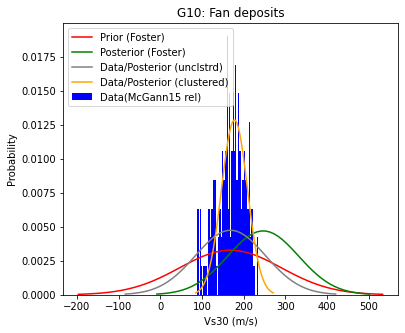

In [38]:
clustered_plot_hist_dist(7)

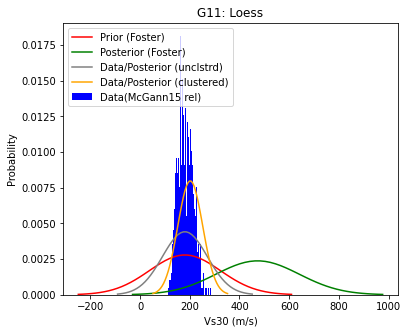

In [39]:
clustered_plot_hist_dist(8)

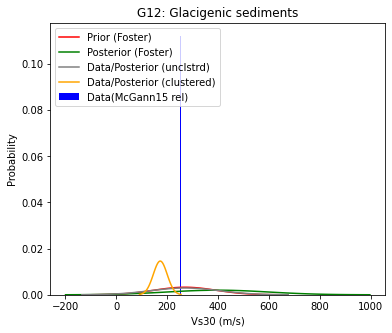

In [40]:
clustered_plot_hist_dist(9)

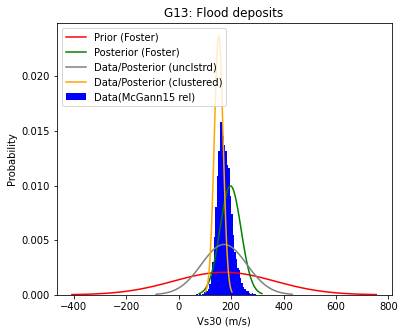

In [41]:
clustered_plot_hist_dist(10)

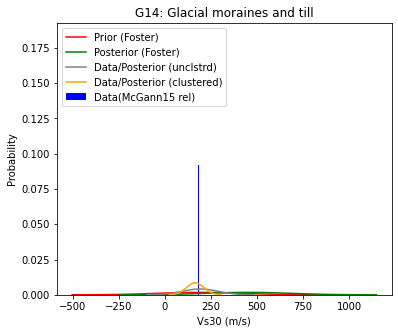

In [42]:
clustered_plot_hist_dist(11)

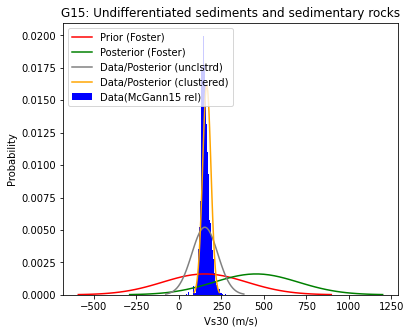

In [43]:
clustered_plot_hist_dist(12)

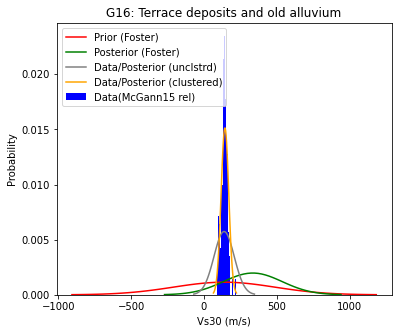

In [44]:
clustered_plot_hist_dist(13)

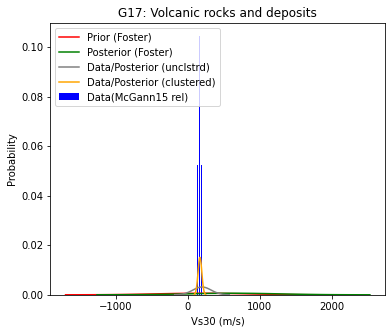

In [45]:
clustered_plot_hist_dist(14)

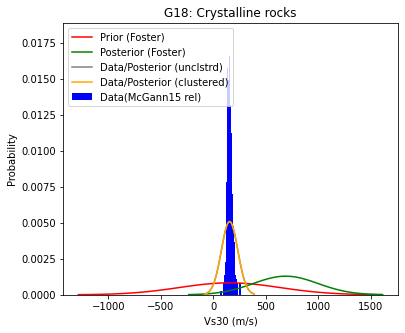

In [46]:
clustered_plot_hist_dist(15)

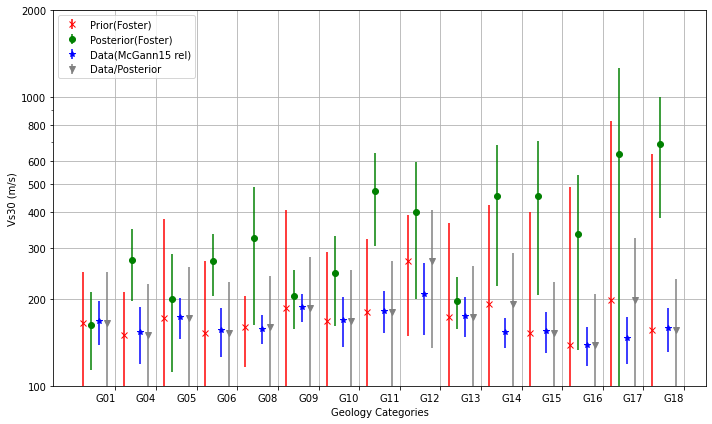

In [50]:
new_posterior_means=new_posterior.T[0]
new_posterior_errors=new_posterior.T[1]*new_posterior_means
clustered_posterior_means=clustered_posterior.T[0]
clustered_posterior_errors=clustered_posterior.T[1]*clustered_posterior_means

fig,ax=plt.subplots()
ax.set_xlabel("Geology Categories")
ax.set_ylabel("Vs30 (m/s)")
#ax.yaxis.grid(True)

ax.set_yscale('log')
ax.set_ylim([100,2000])
yticks=[100,200,300,400,500,600,800,1000,2000]
ax.set_yticks(yticks)
ax.set_yticklabels(yticks)
geo_id_values = np.array([(i+1)*10 for i in range(len(geo_ids)-1)]) #excluding water

ax.set_xticks(geo_id_values)
ax.set_xticklabels(geo_id_codes,fontdict={'horizontalalignment':'right'})


prior_eb=ax.errorbar(geo_id_values-8,prior_means, prior_errors,linestyle="None",marker='x',color="red")
posterior_eb=ax.errorbar(geo_id_values-6,posterior_means, posterior_errors,linestyle="None",marker='o',color="green")
new_eb=ax.errorbar(geo_id_values-4,means,errors,linestyle='None',marker='*',color="blue")
new_posterior_eb= ax.errorbar(geo_id_values-2,new_posterior_means,new_posterior_errors,linestyle='None',marker='v',color="grey")
#clustered_posterior_eb= ax.errorbar(geo_id_values,clustered_posterior_means,clustered_posterior_errors,linestyle='None',marker='^',color="orange")

ax.grid()
ax.legend([prior_eb,posterior_eb,new_eb,new_posterior_eb],['Prior(Foster)','Posterior(Foster)','Data(McGann15 rel)','Data/Posterior'],loc=2)
#ax.legend([prior_eb,posterior_eb,new_eb,new_posterior_eb,clustered_posterior_eb],['Prior(Foster)','Posterior(Foster)','Data(McGann15 rel)','Data/Posterior(unclustered)','Data/Posterior(clustered)'],loc=2)
#ax.legend([posterior_eb,new_eb,new_posterior_eb,clustered_posterior_eb],['Posterior(Foster)','Data(McGann15 rel)','Data/Posterior(unclustered)','Data/Posterior(clustered)'],loc=2)

#plt.rcParams['figure.dpi']=300
plt.rcParams["figure.figsize"] = (10,6)


plt.tight_layout()
plt.show()